In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read Data into Jupyter

data_2yr = pd.read_csv('C://MS_Strath/MS983-Dissertation in DA/compas-scores-two-years.csv')

In [3]:
data_2yr.info()

#It is used to get concise summary about the dataset, as a part of Exploratory Data Analysis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [4]:
data_2yr.shape

#To get the dimension of the "compas-score-two-years" dataset

(7214, 53)

In [5]:
data_2yr.isnull().sum()

#To get the total no of null entries for each feature in the dataset

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [6]:
#Observing null value as total percentage of length of dataset
data_2yr.isnull().sum() * 100/len(data_2yr)

id                           0.000000
name                         0.000000
first                        0.000000
last                         0.000000
compas_screening_date        0.000000
sex                          0.000000
dob                          0.000000
age                          0.000000
age_cat                      0.000000
race                         0.000000
juv_fel_count                0.000000
decile_score                 0.000000
juv_misd_count               0.000000
juv_other_count              0.000000
priors_count                 0.000000
days_b_screening_arrest      4.255614
c_jail_in                    4.255614
c_jail_out                   4.255614
c_case_number                0.304963
c_offense_date              16.065983
c_arrest_date               84.238980
c_days_from_compas           0.304963
c_charge_degree              0.000000
c_charge_desc                0.401996
is_recid                     0.000000
r_case_number               51.885223
r_charge_deg

In [7]:
data_2yr.id.nunique() * 100/len(data_2yr) # Finding out the total % of unique ID in the total dataset, since 100% ID is unique so we can drop the feature

100.0

In [8]:
pd.value_counts(data_2yr.sex)

#Gender Distribution for all the unique entries in the database

Male      5819
Female    1395
Name: sex, dtype: int64

80.662602186203
19.337399303913116


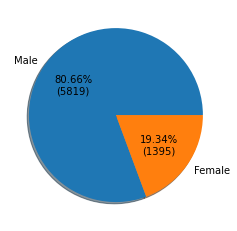

In [9]:
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = pd.value_counts(data_2yr.sex)
total = len(data_2yr)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True);

In [10]:
pd.value_counts(data_2yr.race)

#To get the Race Distribution for all the criminal entries of the database

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

51.23371481895447
34.01718735694885
8.830052614212036
5.225949361920357
0.44358191080391407
0.24951482191681862


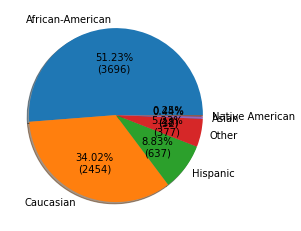

In [11]:

v_countsrace = pd.value_counts(data_2yr.race)
total = len(data_2yr)
fig = plt.figure()
plt.pie(v_countsrace, labels=v_countsrace.index, autopct=my_fmt, shadow=True);

In [12]:
pd.value_counts(data_2yr.score_text)

#To get the distribution of a criminal re-comitting a crime based on the decile score generated by the COMPAS algorithm

Low       3897
Medium    1914
High      1403
Name: score_text, dtype: int64

In [13]:
# Cross-table analysis to show the relation between the decile score as generated by the COMPAS algorithm
# and the corresponding severity based on the score

data_crstab = pd.crosstab(data_2yr['decile_score'],
                            data_2yr['score_text'], 
                               margins = True)
print(data_crstab)

score_text    High   Low  Medium   All
decile_score                          
1                0  1440       0  1440
2                0   941       0   941
3                0   747       0   747
4                0   769       0   769
5                0     0     681   681
6                0     0     641   641
7                0     0     592   592
8              512     0       0   512
9              508     0       0   508
10             383     0       0   383
All           1403  3897    1914  7214


54.01996374130249
26.5317440032959
19.44829523563385


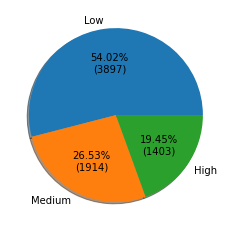

In [14]:

v_countsdec = pd.value_counts(data_2yr.score_text)
total = len(data_2yr)
fig = plt.figure()
plt.pie(v_countsdec, labels=v_countsdec.index, autopct=my_fmt, shadow=True);

In [15]:
pd.value_counts(data_2yr.two_year_recid)

# Actual Distribution of the people re-comitting a crime within the 2 years time period

0    3963
1    3251
Name: two_year_recid, dtype: int64

In [16]:
data_crstab = pd.crosstab(data_2yr['decile_score'],
                            data_2yr['two_year_recid'], 
                               margins = True)
print(data_crstab)

# Cross-table analysis showing the distribution of the decile score as compared to the actual indicator for recidivism
# within the 2 year time-period

two_year_recid     0     1   All
decile_score                    
1               1132   308  1440
2                648   293   941
3                466   281   747
4                435   334   769
5                355   326   681
6                283   358   641
7                242   350   592
8                162   350   512
9                153   355   508
10                87   296   383
All             3963  3251  7214


In [17]:
pd.value_counts(data_2yr.is_recid)

0    3743
1    3471
Name: is_recid, dtype: int64

In [18]:
data_crstab = pd.crosstab(data_2yr['is_recid'],
                            data_2yr['two_year_recid'], 
                               margins = True)
print(data_crstab)

two_year_recid     0     1   All
is_recid                        
0               3743     0  3743
1                220  3251  3471
All             3963  3251  7214


In [19]:
pd.value_counts(data_2yr.age_cat)

# Analysis showing the distribution of the defendants based on their age category.

25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: age_cat, dtype: int64

56.95869326591492
21.846409142017365
21.194899082183838


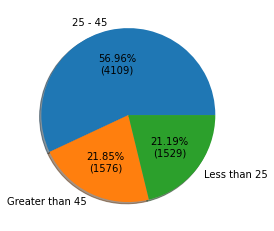

In [20]:
v_countsage = pd.value_counts(data_2yr.age_cat)
total = len(data_2yr)
fig = plt.figure()
plt.pie(v_countsage, labels=v_countsage.index, autopct=my_fmt, shadow=True);

In [21]:
data_crstab = pd.crosstab(data_2yr['age_cat'],
                            data_2yr['two_year_recid'],                             
                               margins = True)
print(data_crstab)

#Cross-table showing the distribution of actual recidivism based on the Age Category , here we can see that people within the age 25-45 
#has the highest positive cases of recidivism

two_year_recid      0     1   All
age_cat                          
25 - 45          2220  1889  4109
Greater than 45  1078   498  1576
Less than 25      665   864  1529
All              3963  3251  7214


In [111]:
recid = data_2yr.groupby(["age_cat", "sex", "race"])["two_year_recid"].mean().unstack(level="race")
recid

#table analysis showing the mean chances of recidivism based on gender,age and Race

race                    African-American     Asian  Caucasian  Hispanic  \
age_cat         sex                                                       
25 - 45         Female          0.382278  0.000000   0.423948  0.333333   
                Male            0.533074  0.153846   0.433699  0.375000   
Greater than 45 Female          0.227273  1.000000   0.239766  0.217391   
                Male            0.425101  0.300000   0.289157  0.216667   
Less than 25    Female          0.449704       NaN   0.310345  0.411765   
                Male            0.645806  0.428571   0.541254  0.536364   

race                    Native American     Other  
age_cat         sex                                
25 - 45         Female              1.0  0.243243  
                Male                0.3  0.358382  
Greater than 45 Female              0.5  0.200000  
                Male                1.0  0.271429  
Less than 25    Female              NaN  0.200000  
                Male                1.0  0.552239

In [112]:
dec_scr = data_2yr.groupby(["age_cat", "sex", "race"])["decile_score"].mean().unstack(level="race")
dec_scr

#table analysis showing the mean decile score based on gender,age and Race

race                    African-American     Asian  Caucasian  Hispanic  \
age_cat         sex                                                       
25 - 45         Female          4.541772  1.000000   4.177994  2.888889   
                Male            5.525292  2.846154   3.980060  3.417763   
Greater than 45 Female          3.443182  3.000000   2.315789  1.565217   
                Male            4.206478  2.100000   2.301205  2.241667   
Less than 25    Female          5.946746       NaN   6.011494  4.647059   
                Male            6.288948  4.571429   5.369637  5.463636   

race                    Native American     Other  
age_cat         sex                                
25 - 45         Female         7.000000  2.486486  
                Male           5.600000  2.670520  
Greater than 45 Female         6.000000  1.200000  
                Male          10.000000  1.642857  
Less than 25    Female              NaN  4.733333  
                Male           6.333333  5.283582

Text(0.5, 0.98, 'Score Frequency by Race')

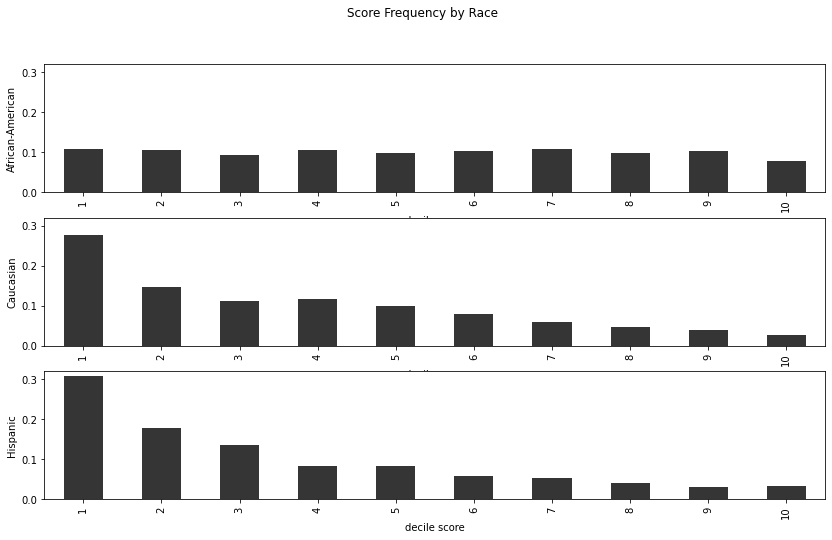

In [113]:
#Bar chart showing distribution of the COMPAS generated decile score for the three most popular races in the dataset,
#i.e African-American, Hispanic and Caucasian

dfgb = data_2yr.groupby("race")
race_count = data_2yr.groupby("race")["name"].count()

fig, ax = plt.subplots(3, figsize=(14, 8))

for (i, race) in enumerate(["African-American", "Caucasian", "Hispanic"]):
    (
        (dfgb
            .get_group(race)
            .groupby("decile_score")["name"].count() / race_count[race]
        )
        .plot(kind="bar", ax=ax[i], color="#353535")
    )
    ax[i].set_ylabel(race)
    ax[i].set_xlabel("decile score")
    # set equal y limit for visual comparison
    ax[i].set_ylim(0, 0.32)

fig.suptitle("Score Frequency by Race")

In [114]:
data_2yr[["decile_score", "two_year_recid"]].corr()

#Correlation between the actual decile scores and actual cases of recidivism within the 2 year time period

,decile_score,two_year_recid
decile_score,1.000000,0.350703
two_year_recid,0.350703,1.000000


In [115]:
numerical_features = [feature for feature in data_2yr.columns if data_2yr[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

data_2yr[numerical_features].head()  #looking for numerical features in dataset 

Number of numerical variables:  20


,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
0,1,69,0,1,0,0,0,-1.0,1.0,0,NaN,NaN,0,1,1,0,0,327,0,0
1,3,34,0,3,0,0,0,-1.0,1.0,1,NaN,NaN,1,3,1,0,9,159,1,1
2,4,24,0,4,0,1,4,-1.0,1.0,1,0.0,NaN,0,4,3,4,0,63,0,1
3,5,23,0,8,1,0,1,NaN,1.0,0,NaN,NaN,0,8,6,1,0,1174,0,0
4,6,43,0,1,0,0,2,NaN,76.0,0,NaN,NaN,0,1,1,2,0,1102,0,0


In [116]:
categorical_features=[feature for feature in data_2yr.columns if data_2yr[feature].dtypes=='O']
categorical_features

#checking for all the categorical features present in the dataset

['name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age_cat',
 'race',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_offense_date',
 'c_arrest_date',
 'c_charge_degree',
 'c_charge_desc',
 'r_case_number',
 'r_charge_degree',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'type_of_assessment',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody']

In [117]:
#checking for total no of categories for each categorical feature in the dataset

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data_2yr[feature].unique())))   
        

The feature is name and number of categories are 7158
The feature is first and number of categories are 2800
The feature is last and number of categories are 3950
The feature is compas_screening_date and number of categories are 690
The feature is sex and number of categories are 2
The feature is dob and number of categories are 5452
The feature is age_cat and number of categories are 3
The feature is race and number of categories are 6
The feature is c_jail_in and number of categories are 6908
The feature is c_jail_out and number of categories are 6881
The feature is c_case_number and number of categories are 7193
The feature is c_offense_date and number of categories are 928
The feature is c_arrest_date and number of categories are 581
The feature is c_charge_degree and number of categories are 2
The feature is c_charge_desc and number of categories are 438
The feature is r_case_number and number of categories are 3472
The feature is r_charge_degree and number of categories are 11
Th

In [118]:
data_2yr.drop(columns=['id','name','first','last','dob','c_jail_in','c_jail_out','c_case_number','c_offense_date','c_arrest_date','c_charge_desc','r_case_number','r_offense_date','r_charge_desc','r_jail_in','r_jail_out','vr_case_number','vr_offense_date','vr_charge_desc','screening_date','screening_date','v_screening_date','in_custody','out_custody'], inplace= True, axis = 1)
#dropping the above categorical features because of having higher dimensions of category, since extreme high level categories is unwanted for building classification model

In [119]:
#checking for total no of categories for each categorical feature in the dataset after dropping some categorical features in the previous block

categorical_features1=[feature for feature in data_2yr.columns if data_2yr[feature].dtypes=='O']


for feature in categorical_features1:
    print('The feature is {} and number of categories are {}'.format(feature,len(data_2yr[feature].unique())))

The feature is compas_screening_date and number of categories are 690
The feature is sex and number of categories are 2
The feature is age_cat and number of categories are 3
The feature is race and number of categories are 6
The feature is c_charge_degree and number of categories are 2
The feature is r_charge_degree and number of categories are 11
The feature is vr_charge_degree and number of categories are 10
The feature is type_of_assessment and number of categories are 1
The feature is score_text and number of categories are 3
The feature is v_type_of_assessment and number of categories are 1
The feature is v_score_text and number of categories are 3


In [120]:
data_2yr.drop(columns=['compas_screening_date'], inplace = True)

#dropping the above categorical features because of having higher dimensions of category

In [121]:
lab_enc = LabelEncoder()
data_2yr['sex'] = lab_enc.fit_transform(data_2yr['sex'])  
data_2yr['age_cat'] = lab_enc.fit_transform(data_2yr['age_cat']) 
data_2yr['race'] = lab_enc.fit_transform(data_2yr['race']) 
data_2yr['c_charge_degree'] = lab_enc.fit_transform(data_2yr['c_charge_degree']) 
data_2yr['r_charge_degree'] = lab_enc.fit_transform(data_2yr['r_charge_degree'])
data_2yr['vr_charge_degree'] = lab_enc.fit_transform(data_2yr['vr_charge_degree'])
data_2yr['type_of_assessment'] = lab_enc.fit_transform(data_2yr['type_of_assessment'])
data_2yr['score_text'] = lab_enc.fit_transform(data_2yr['score_text'])
data_2yr['v_type_of_assessment'] = lab_enc.fit_transform(data_2yr['v_type_of_assessment'])
data_2yr['v_score_text'] = lab_enc.fit_transform(data_2yr['v_score_text'])

# All categorical features are converted to numerical features using Label Encoder so that they can be passed on to the 
# Random Forest Algorithm

In [122]:
data_2yr.head()

#Checking for reslts after Label Encoding Categorical features

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,start,end,event,two_year_recid
0,1,69,1,5,0,1,0,0,0,-1.0,...,1,1,0,1,1,0,0,327,0,0
1,1,34,0,0,0,3,0,0,0,-1.0,...,3,1,0,1,1,0,9,159,1,1
2,1,24,2,0,0,4,0,1,4,-1.0,...,4,1,0,3,1,4,0,63,0,1
3,1,23,2,0,0,8,1,0,1,NaN,...,8,0,0,6,2,1,0,1174,0,0
4,1,43,0,5,0,1,0,0,2,NaN,...,1,1,0,1,1,2,0,1102,0,0


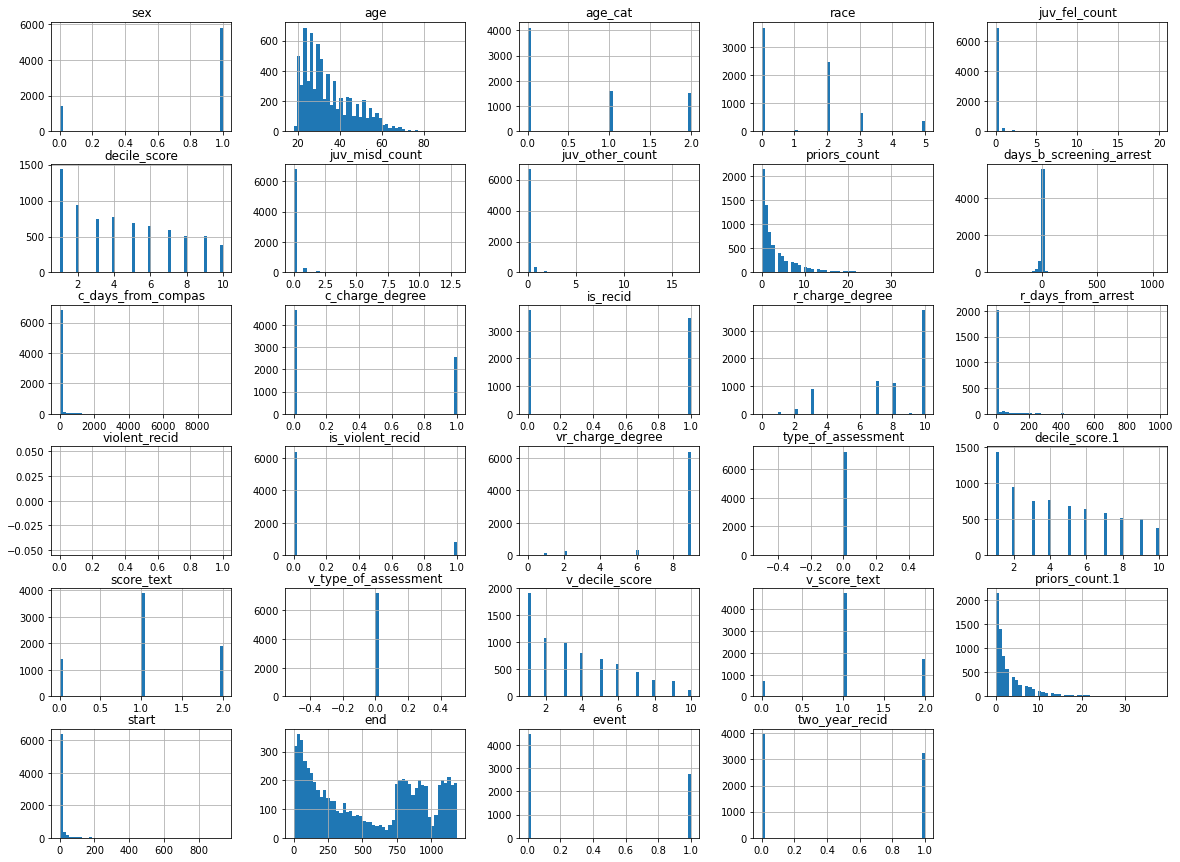

In [123]:
%matplotlib inline
data_2yr.hist(bins=50, figsize=(20,15))
plt.show()

#Histogram showing distribution of value for all the features in the dataset

In [124]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(25, 20)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = 1.0,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 10})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

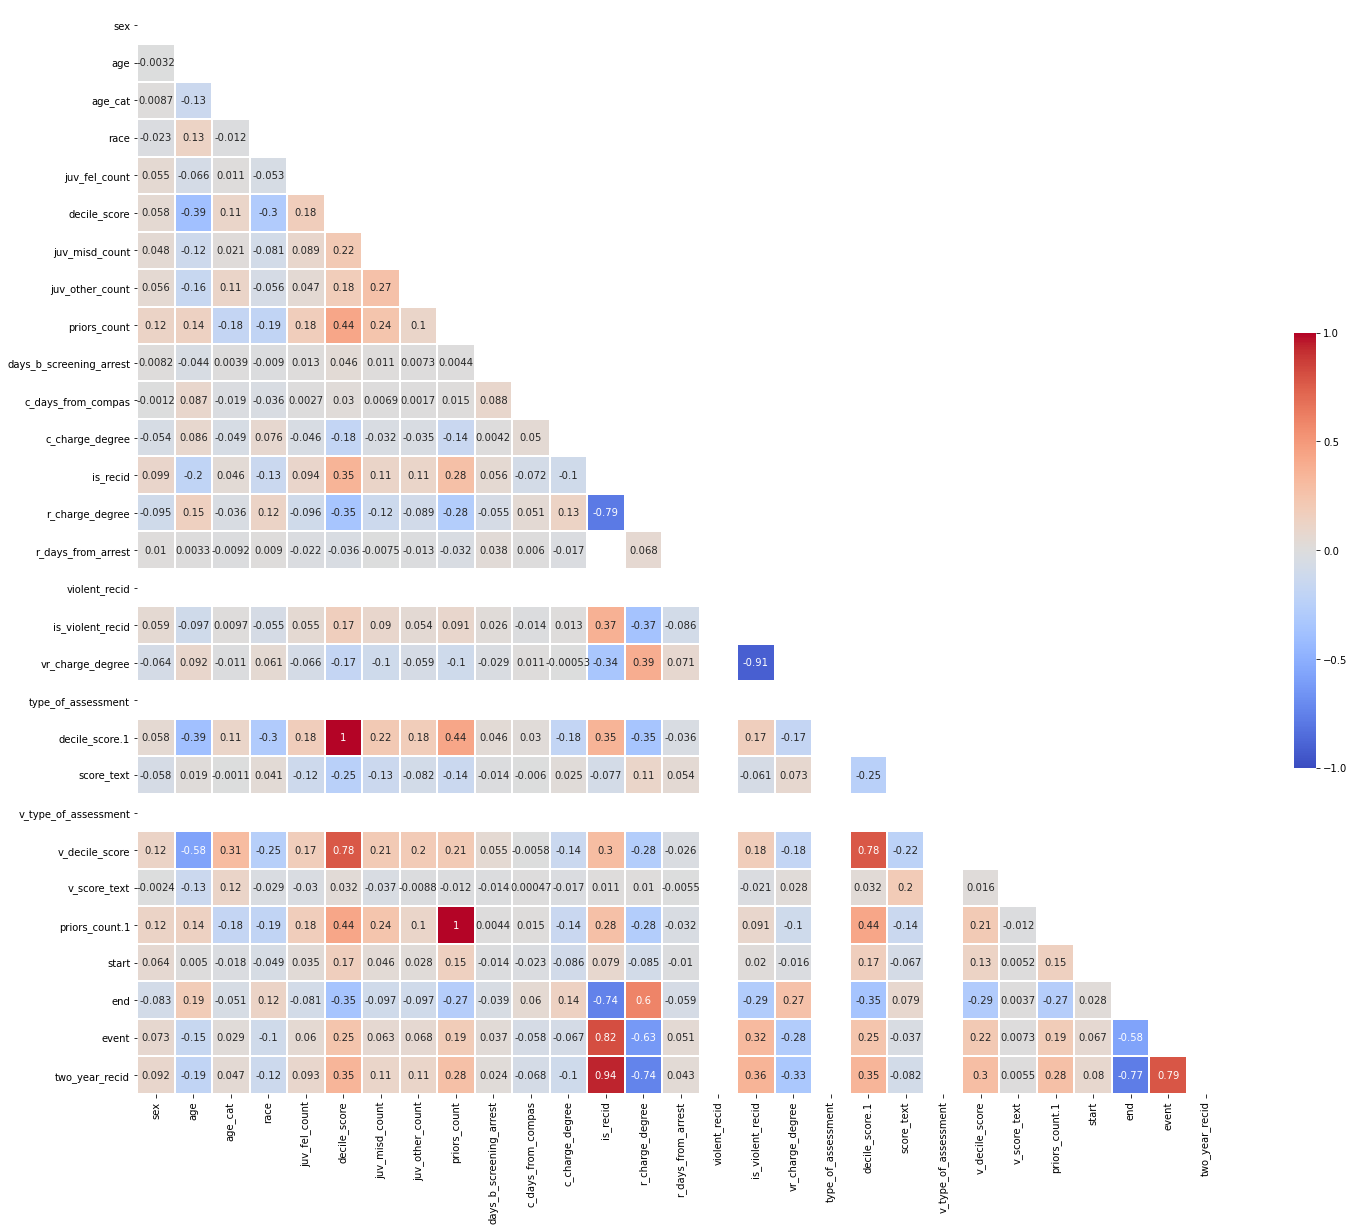

In [125]:
corr_heatmap(data_2yr)

# Heatmap showing correlation between different fetaures with one another,looking at this correlation heatmap, we decide to drop,
# features with more than 50% correlation with the output feature i.e two_year_recid

In [126]:
data_2yr.isnull().sum()
#Checking for total no of null entries left in the dataset for all the left features.

sex                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_days_from_compas           22
c_charge_degree               0
is_recid                      0
r_charge_degree               0
r_days_from_arrest         4898
violent_recid              7214
is_violent_recid              0
vr_charge_degree              0
type_of_assessment            0
decile_score.1                0
score_text                    0
v_type_of_assessment          0
v_decile_score                0
v_score_text                  0
priors_count.1                0
start                         0
end                           0
event                         0
two_year_recid                0
dtype: int64

In [127]:
data_2yr['days_b_screening_arrest'].fillna(int(data_2yr['days_b_screening_arrest'].mean()), inplace=True)

# 'days_b_screening_arrest' feature has 307 null entries these null entries are replaced here with the mean value fpr the feature.

In [128]:
data_2yr['c_days_from_compas'].fillna(int(data_2yr['c_days_from_compas'].mean()),inplace=True)

# 'c_days_from_compas' has 22 null entries which are replaced by the mean value for the feature.

In [129]:
#Function to plot the feature importances for the rnadom Forest Algorithm

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [130]:
#Input and output feature list are defined below and are separated into 2 separate datasets

features = ["sex","age","age_cat","race","decile_score","juv_fel_count","juv_misd_count","juv_other_count","priors_count","days_b_screening_arrest","c_days_from_compas","c_charge_degree","type_of_assessment","score_text","v_type_of_assessment","v_decile_score","v_score_text","priors_count.1","start"]
data_X = data_2yr[features].values
data_Y = data_2yr['two_year_recid'].values

In [131]:
#train_test_split is used from scikit-learn package the dataset with input feature and the dataset with output feature are
# separated into train and test set, where train set has 80% observations from the original dataset and test has 20% observations.


from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y, test_size=0.2, random_state=42)

In [132]:
#1st Model with all the correlated features and the sensitive field like race is not balanced

rand_forr = RandomForestClassifier(n_estimators=200, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rand_forr.fit(X_train,Y_train) #Random Forest classifier is run with all sensitive inbalanced input features like Sex and Race

RandomForestClassifier(max_leaf_nodes=20, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [133]:
# the Accuracy for the training set is checked and also the predictions based on the training set is also made.

Y_pred = rand_forr.predict(X_train)
print("Accuracy score: " ,accuracy_score(Y_train, Y_pred))

Accuracy score:  0.7028244671634032


In [134]:
#The accuracy for the test set is made and the predictions based on the test set is made here, here we can see since the accuracy
# of the test set is similar to the training set, which indicates taht our model does not show over-fittimg

Y_Predicted = rand_forr.predict(X_test)
print("Accuracy score: " ,accuracy_score(Y_test, Y_Predicted))

Accuracy score:  0.7006237006237006


In [135]:
# Evaluation Report on train set
print(metrics.classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      3140
           1       0.70      0.60      0.65      2631

    accuracy                           0.70      5771
   macro avg       0.70      0.69      0.70      5771
weighted avg       0.70      0.70      0.70      5771



In [136]:
# Evaluation Report on test set
print(metrics.classification_report(Y_test, Y_Predicted))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       823
           1       0.67      0.60      0.63       620

    accuracy                           0.70      1443
   macro avg       0.69      0.69      0.69      1443
weighted avg       0.70      0.70      0.70      1443



In [137]:
#Confusion Matrix on the training set and it's corresponding prediction
print(metrics.confusion_matrix(Y_train,Y_pred))

[[2472  668]
 [1047 1584]]


In [138]:
#Confusion Matrix on the test set and it's corresponding prediction
print(metrics.confusion_matrix(Y_test,Y_Predicted))

[[641 182]
 [250 370]]


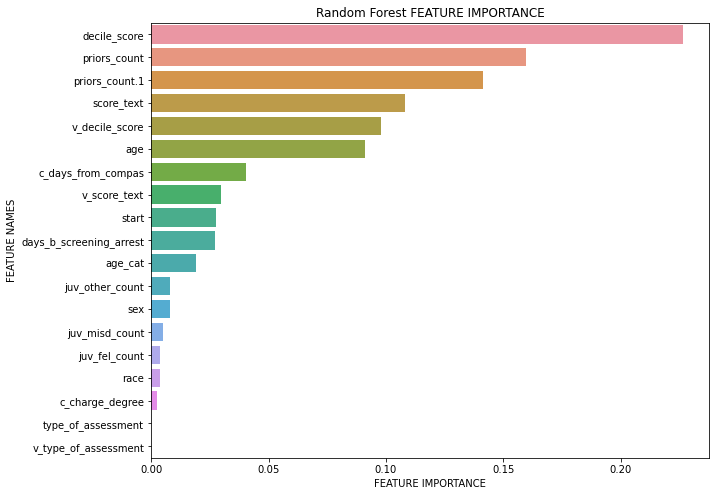

In [139]:
feat_imp = rand_forr.feature_importances_
mod_nm ='Random Forest'
plot_feature_importance(feat_imp,features,mod_nm)

In [140]:
#Input and output feature list are defined below and are separated into 2 separate datasets here the sensitive features i.e sex and race
# are dropped from the feature list

features_sens = ["age","age_cat","decile_score","juv_fel_count","juv_misd_count","juv_other_count","priors_count","days_b_screening_arrest","c_days_from_compas","c_charge_degree","type_of_assessment","score_text","v_type_of_assessment","v_decile_score","v_score_text","priors_count.1","start"]
data_X1 = data_2yr[features_sens].values
data_Y1 = data_2yr['two_year_recid'].values

In [141]:
#train_test_split is used from scikit-learn package the dataset with input feature and the dataset with output feature are
# separated into train and test set, where train set has 80% observations from the original dataset and test has 20% observations.

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(data_X1,data_Y1, test_size=0.2, random_state=42)

In [160]:
#2nd model with the training data missing sensitive features like race and sex
rand_forr1 = RandomForestClassifier(n_estimators=200, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rand_forr1.fit(X_train1,Y_train1) #Random Forest algorithm is run without sex and race input feature

RandomForestClassifier(max_leaf_nodes=20, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [161]:
# the Accuracy for the training set is checked and also the predictions based on the training set is also made.

Y_pred_sens = rand_forr1.predict(X_train1)
print("Accuracy score: " ,accuracy_score(Y_train1, Y_pred_sens))

Accuracy score:  0.7019580661930341


In [162]:
#The accuracy for the test set is made and the predictions based on the test set is made here, here we can see since the accuracy
# of the test set is similar and slightly higer than the training set, which indicated that our model is very slightly overfitted

Y_Predicted_sens = rand_forr1.predict(X_test1)
print("Accuracy score: " ,accuracy_score(Y_test1, Y_Predicted_sens))

Accuracy score:  0.6936936936936937


In [158]:
# Evaluation Report on train set

print(metrics.classification_report(Y_train1, Y_pred_sens))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      3140
           1       0.68      0.59      0.63      2631

    accuracy                           0.69      5771
   macro avg       0.69      0.68      0.68      5771
weighted avg       0.69      0.69      0.68      5771



In [159]:
# Evaluation Report on test set

print(metrics.classification_report(Y_test1, Y_Predicted_sens))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       823
           1       0.65      0.59      0.62       620

    accuracy                           0.69      1443
   macro avg       0.68      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443



In [50]:
#Confusion Matrix on the training set and it's corresponding prediction

print(metrics.confusion_matrix(Y_train1, Y_pred_sens))

[[2444  696]
 [1020 1611]]


In [53]:
#Confusion Matrix on the test set and it's corresponding prediction

print(metrics.confusion_matrix(Y_test1, Y_Predicted_sens))

[[645 178]
 [242 378]]


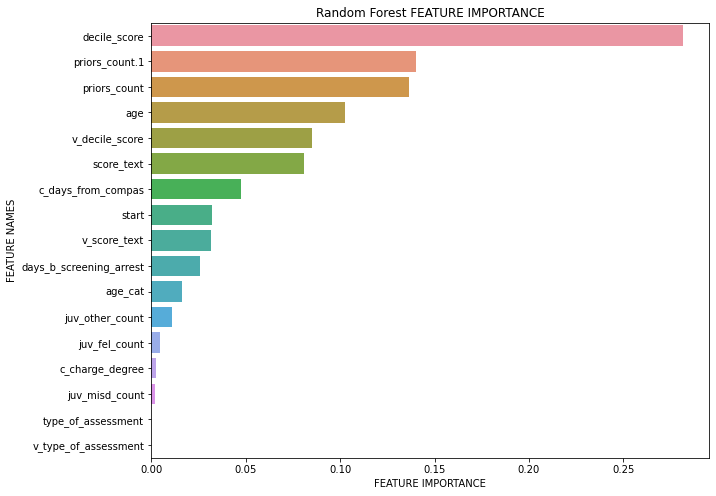

In [52]:
#Feature importance is plotted for the 2nd Random forest model

feat_imp1 = rand_forr1.feature_importances_

plot_feature_importance(feat_imp1,features_sens,mod_nm)

In [58]:
#Function to augment the input features having imbalanced data specially for imbalanced sensitive categorical feature like race

def upsample_classes(data, target):
    
    lst = list(data[target].unique())
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    regroup = pd.concat(classes)
    maj_class = regroup[regroup[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes)
    upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])

    return upsample

In [59]:
# The race feature is passed through upsample_Classes function to make the imbalanced race feature balanced thus removing biasedness 
# from the race feature

data1_2yr = upsample_classes(data_2yr,'race')

In [60]:
pd.value_counts(data1_2yr.race)

#The race is balanced for all race categories

5    3696
4    3696
3    3696
2    3696
1    3696
0    3696
Name: race, dtype: int64

In [61]:
#Input and output feature list are defined below and are separated into 2 separate datasets here the sensitive feature race is balanced
# and passed as input feature

features_bal = ["sex","age","age_cat","race","decile_score","juv_fel_count","juv_misd_count","juv_other_count","priors_count","days_b_screening_arrest","c_days_from_compas","c_charge_degree","type_of_assessment","score_text","v_type_of_assessment","v_decile_score","v_score_text","priors_count.1","start"]
data_X2 = data1_2yr[features_bal].values
data_Y2 = data1_2yr['two_year_recid'].values

In [62]:
#train_test_split is used from scikit-learn package the dataset with input feature and the dataset with output feature are
# separated into train and test set, where train set has 80% observations from the original dataset and test has 20% observations.

X_train2,X_test2,Y_train2,Y_test2 = train_test_split(data_X2,data_Y2, test_size=0.2, random_state=42)

In [63]:
#3rd Model with the race data balanced
rand_forr2 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rand_forr2.fit(X_train2,Y_train2) #Random Forest algorithm is run with sex and race input feature which is balanced using resampling techniques

RandomForestClassifier(max_leaf_nodes=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [64]:
# the Accuracy for the training set is checked and also the predictions based on the training set is also made for 3rd model

Y_Pred_bal = rand_forr2.predict(X_train2)
print("Accuracy score: " ,accuracy_score(Y_train2, Y_Pred_bal))

Accuracy score:  0.7974633596392333


In [68]:
#The accuracy for the test set is made and the predictions based on the test set is made here for 3rd model, here we can see since the accuracy
# of the test set is similar and slightly higer than the training set, which indicated that our model is very slightly overfitted

Y_Predicted_bal = rand_forr.predict(X_test2)
print("Accuracy score: " ,accuracy_score(Y_test2, Y_Predicted_bal))

Accuracy score:  0.7348963029756538


In [69]:
pd.value_counts(Y_Predicted_bal)

0    2871
1    1565
dtype: int64

In [70]:
# Evaluation Report on train set

print(metrics.classification_report(Y_train2, Y_Pred_bal))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     10495
           1       0.79      0.68      0.73      7245

    accuracy                           0.80     17740
   macro avg       0.80      0.78      0.79     17740
weighted avg       0.80      0.80      0.79     17740



In [71]:
# Evaluation Report on test set

print(metrics.classification_report(Y_test2, Y_Predicted_bal))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2601
           1       0.71      0.61      0.65      1835

    accuracy                           0.73      4436
   macro avg       0.73      0.72      0.72      4436
weighted avg       0.73      0.73      0.73      4436



In [75]:
# Confusion Matrix on the training set and it's corresponding prediction for 3rd model

print(metrics.confusion_matrix(Y_train2, Y_Pred_bal))

[[9202 1293]
 [2300 4945]]


In [76]:
# Confusion Matrix on the training set and it's corresponding prediction for 3rd model

print(metrics.confusion_matrix(Y_test2, Y_Predicted_bal))

[[2148  453]
 [ 723 1112]]


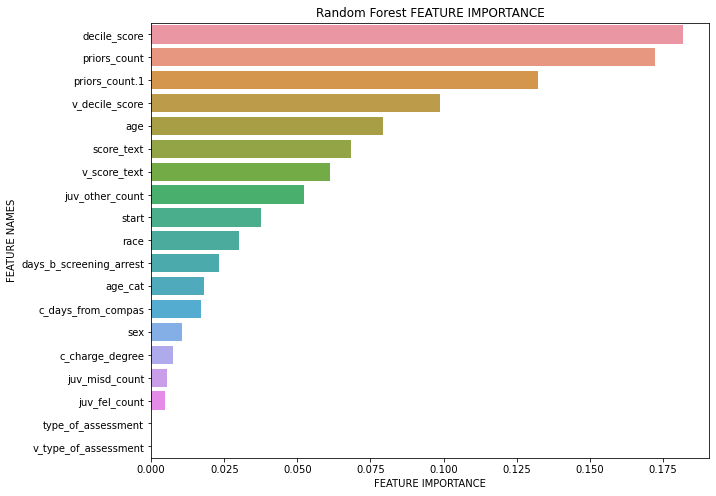

In [77]:
#Feature importance is plotted for the 3rd Random forest model

feat_imp2 = rand_forr2.feature_importances_

plot_feature_importance(feat_imp2,features_bal,mod_nm)